In [1]:
import os 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import numpy as np

In [2]:
fish_dataset = pd.read_csv("../Fish.csv")
fish_dataset.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


### Split the train set and test set in ratio 70:30 (Strategy split)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fish_dataset.drop(["Species"], axis=1), fish_dataset["Species"], test_size=0.3)

### Save train and test set

In [4]:
# Save train
table = X_train.copy()
table["Species"] = y_train
table.to_csv("train_fish.csv", index=False)

In [5]:
# Save train
table = X_test.copy()
table["Species"] = y_test
table.to_csv("test_fish.csv", index=False)

In [6]:
species_list = []

for i in fish_dataset["Species"]:
    if i not in species_list:
        species_list.append(i)

print(species_list)

['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']


### Read again train set and test set

In [7]:
fish_dataset = pd.read_csv("train_fish.csv")
test_dataset = pd.read_csv("test_fish.csv")

### Species theo Width and Height

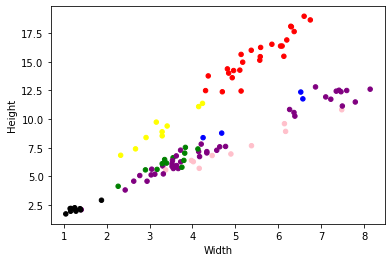

In [8]:
species_dictionary = fish_dataset["Species"].map({'Bream': 'red', 'Roach': 'green', 'Whitefish': 'blue', 'Parkki': 'yellow', 'Perch': 'purple', 'Pike': 'pink', 'Smelt': 'black'})
fish_dataset.plot(kind="scatter", x= "Width", y="Height", c=species_dictionary)
plt.show()

--> From the above diagram, it can be seen obviously that we can classify the Bream, Parkki, Smelt
easily by using the Width and Height

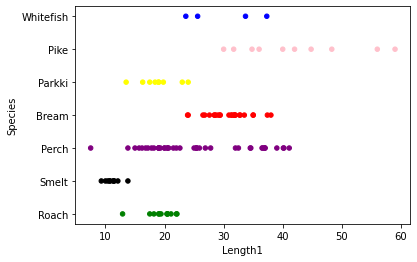

In [9]:
fish_dataset.plot(kind="scatter", x="Length1", y="Species", c=species_dictionary)
plt.show()

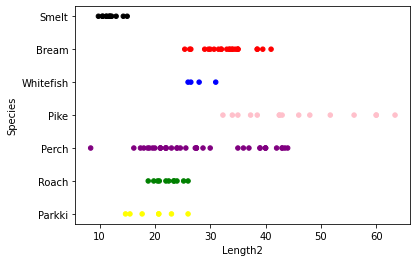

In [46]:
fish_dataset.plot(kind="scatter", x="Length2", y="Species", c=species_dictionary)
plt.show()

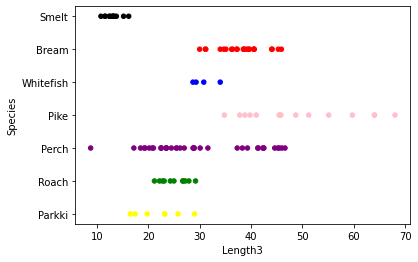

In [47]:
fish_dataset.plot(kind="scatter", x="Length3", y="Species", c=species_dictionary)
plt.show()

--> From three above diagram, we can see that the Length1, Length2, Length3 are likely same with each other. We will test it by using the heatmap diagram

<AxesSubplot:>

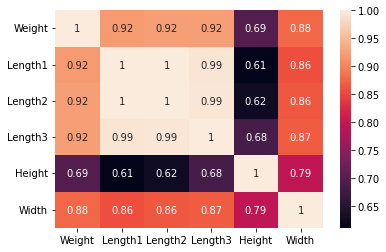

In [48]:
fish_dataset_corr_table = fish_dataset.corr()
sns.heatmap(fish_dataset_corr_table, annot=True)

We use the correlation matrix here to find the correlation value between two attribute in this fish dataset. To our knowledge, the correlation value is a presentation of the similarity between two attribute in the dataset.
Consider x is the correlation value between 2 attributes in the dataset(X, Y).
- x = +-1 --> Y = aX + b
- x > 0 --> increase correlation
- x < 0 --> decrease correlation
- x = 0 --> no correlation
Therefore, we can use it to drop some unnecessary attributes. If not, those similar attribute will make the model hard for learning this fish dataset

In [ ]:
# Remove Width, Weight, Length1

### Drop three columns

In [52]:
fish_dataset

,Weight,Length1,Length2,Length3,Height,Width,Species
0,90.0,16.3,17.7,19.8,7.4052,2.6730,Parkki
1,290.0,24.0,26.0,29.2,8.8768,4.4968,Roach
2,850.0,36.9,40.0,42.3,11.9286,7.1064,Perch
3,300.0,34.8,37.3,39.8,6.2884,4.0198,Pike
4,265.0,25.4,27.5,28.9,7.0516,4.3350,Perch
...,...,...,...,...,...,...,...
106,1015.0,37.0,40.0,42.4,12.3808,7.4624,Perch
107,160.0,21.1,22.5,25.0,6.4000,3.8000,Roach
108,145.0,20.5,22.0,24.3,6.6339,3.5478,Roach
109,140.0,19.0,20.7,23.2,8.5376,3.2944,Parkki


### Prepare dataset for training part

In [ ]:
train_dataset = fish_dataset.drop(['Length2', 'Length1', 'Length3'], axis=1)